('天猫奢品官方直营', 'KG海外专营店', 'stellaluna旗舰店', 'StadiumGoods海外旗舰店', 'ecco旗舰店', 'ash官方旗舰店', 'MONNIERFreres海外旗舰店', 'petitcooskin旗舰店', '魅力惠官方旗舰店', '万奢城旗舰店', '银泰百货精品旗舰店', 'estate旗舰店', '奢殿官方旗舰店', 'staccato旗舰店', '东方信天翁专营店', '魅力惠海外旗舰店', 'BarneysNewYork海外旗舰店', '国意服饰专营店', 'sheme旗舰店', '卡莫兹旗舰店')


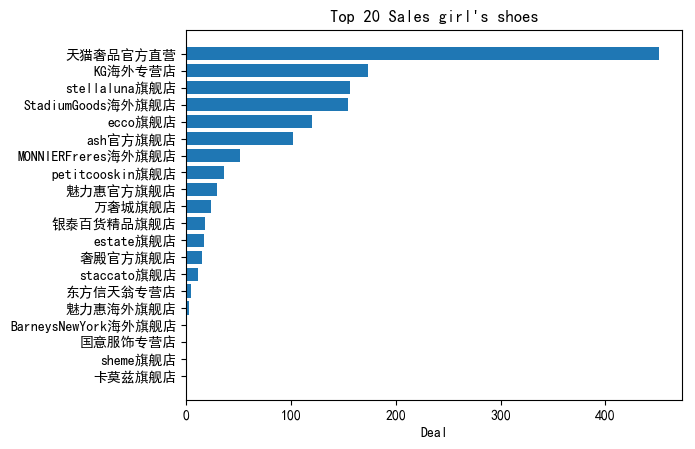

In [23]:
# -*-coding: utf-8 -*-
import pymysql  as pm
import matplotlib.pyplot as plt
import numpy as np


class View:
    def __init__(self):
        # 打开数据库连接
        self.db = pm.connect("localhost", "root", "Welcome1", "test", charset='utf8')
        # 使用cursor()方法获取操作游标
        self.cursor = self.db.cursor()

    def qury(self):
        # SQL 查询语句
        sql = "select shop,sum(deal) from tmallshoes where deal > 0 and price>3000 GROUP BY shop ORDER BY SUM(deal) DESC LIMIT %d" % (20)
        try:
            # 执行SQL语句
            self.cursor.execute(sql)
            # 获取所有记录列表
            results = self.cursor.fetchall()
            shop, deal = [], []
            for row in results:
                shop.append(row[0])
                deal.append(row[1])
                # 打印结果
                # print("title=%s,link=%s,price=%d,deal=%d,shop=%s" % (title, link, price, deal, shop))
            return shop, deal
        except:
            print("Error: unable to fecth data")
        finally:
            self.close()

    def close(self):
        self.db.close()


def main():
    view = View()
    shop, deal = view.qury()
    shop = tuple(shop)
    deal = tuple(deal)
    print(shop)

    plt.rcdefaults()
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    fig, ax = plt.subplots()

    # Example data
    y_pos = np.arange(20)

    ax.barh(y_pos, deal)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(shop)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Deal')
    ax.set_title("Top 20 Sales girl's shoes")
    plt.show()

if __name__ == '__main__':
    main()